# Temoa Simulation Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from data_parser import get_output_files, make_capacity_plots, make_emissions_plots
from data_parser import get_scenario_name, parse_datalines, create_dataframe, create_column
from data_parser import data_by_tech, data_by_variable, data_by_year
from data_parser import variables, time_horizon, get_total

In [2]:
file_list = get_output_files()

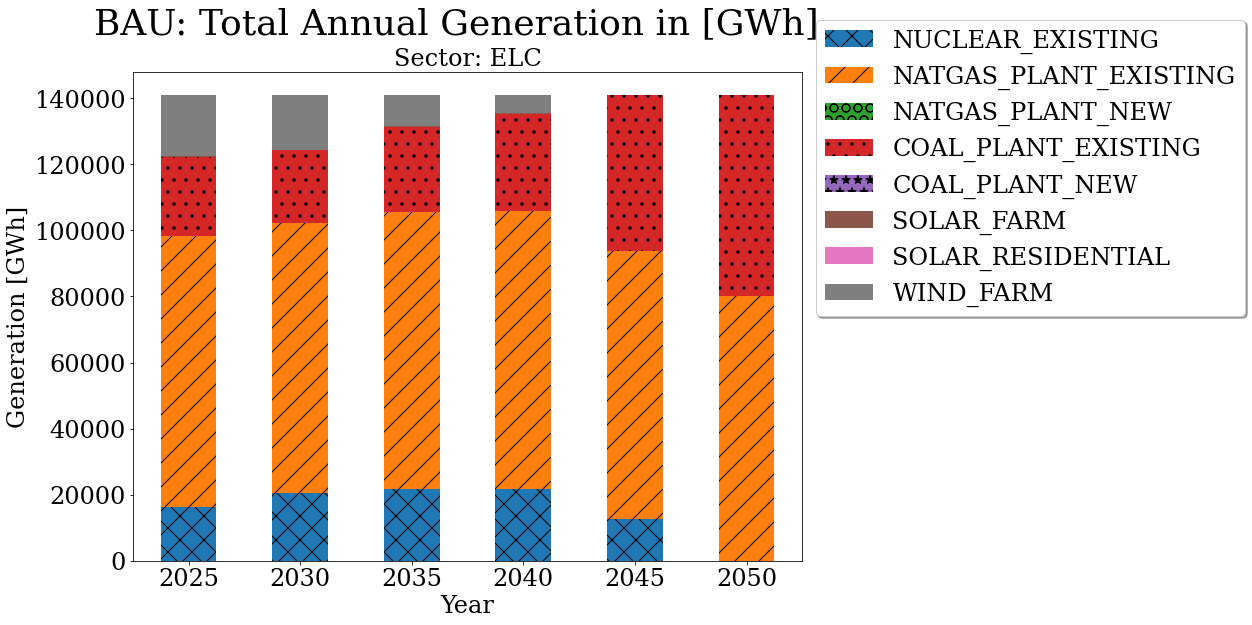

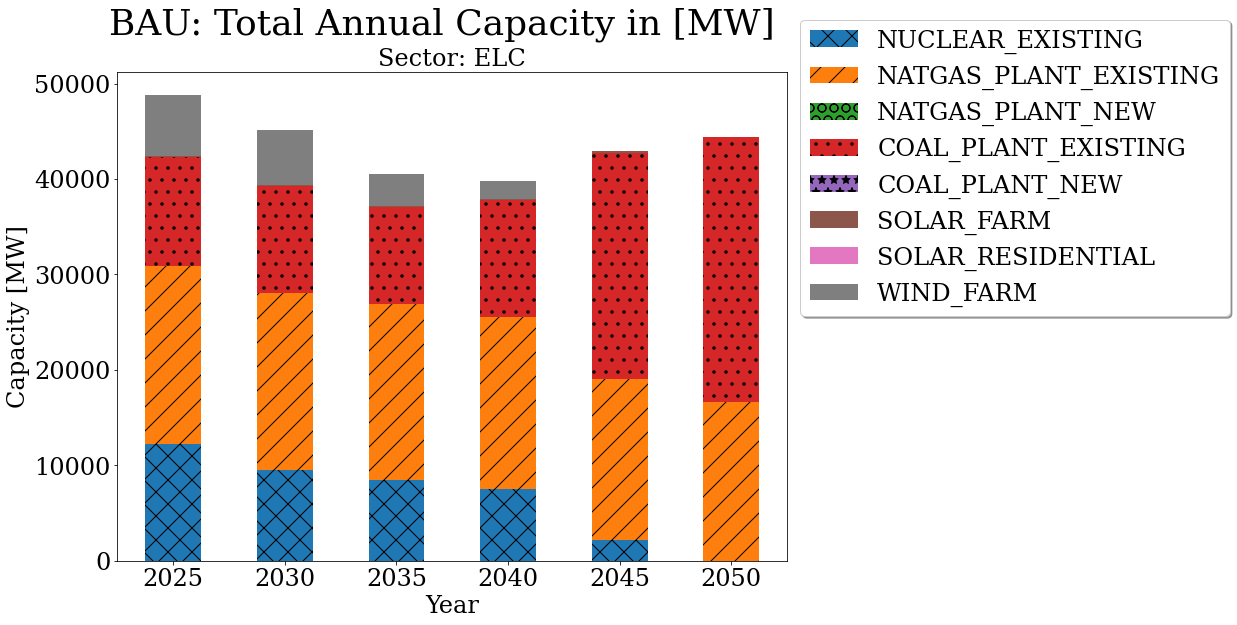

In [3]:
for file in file_list:
    make_capacity_plots(file_list, to_save=False)

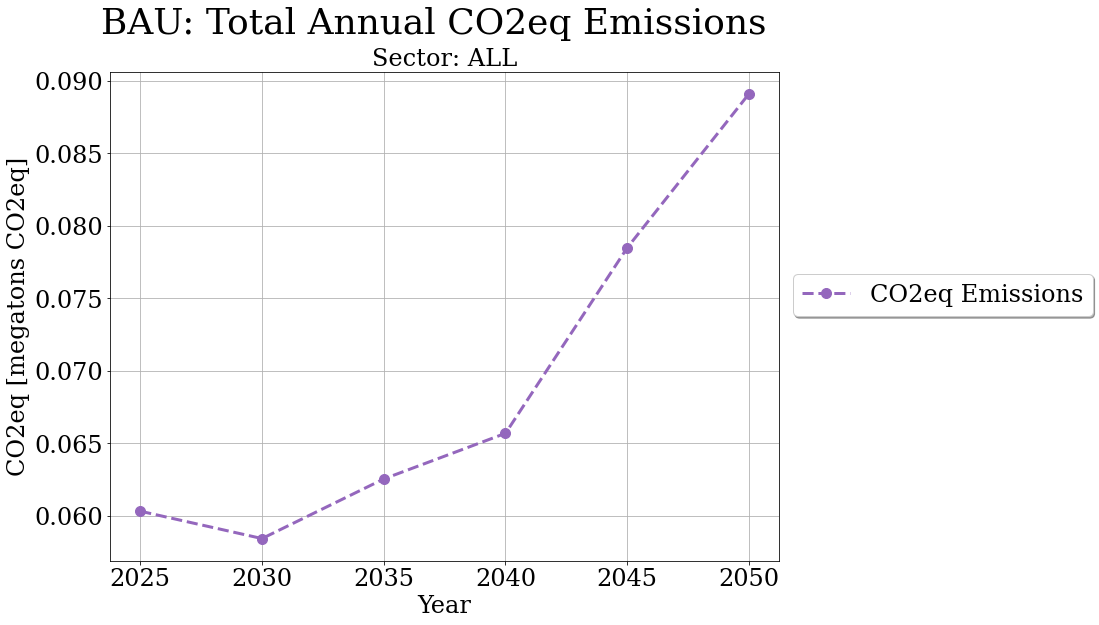

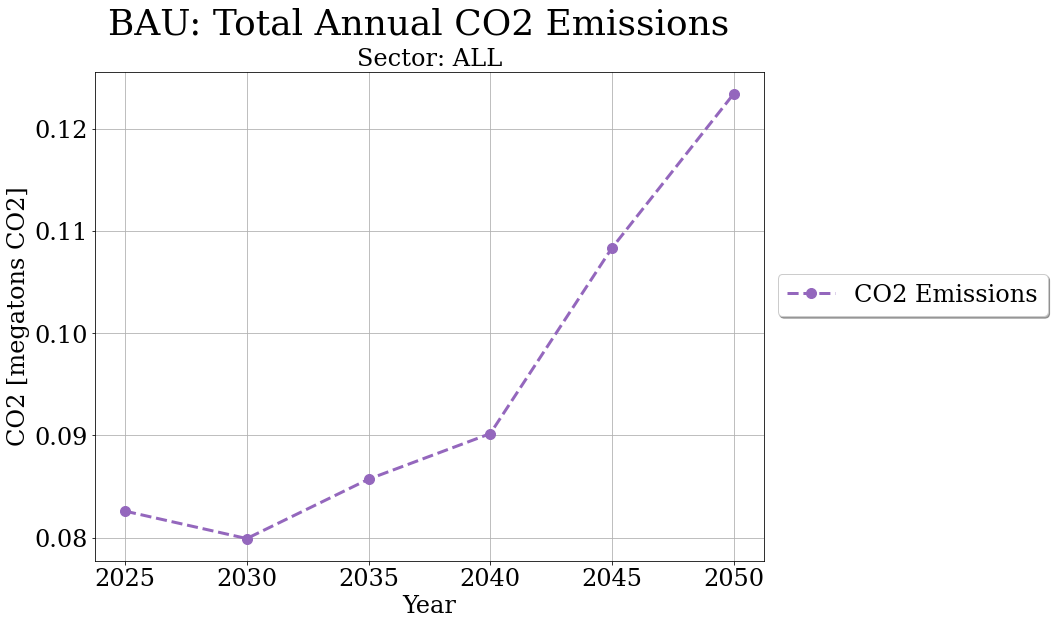

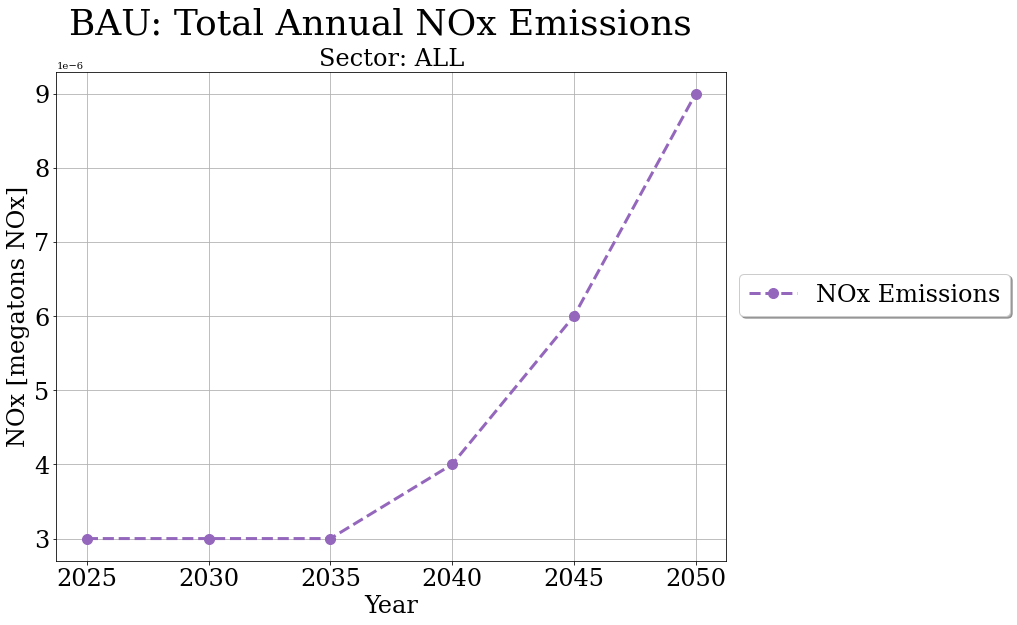

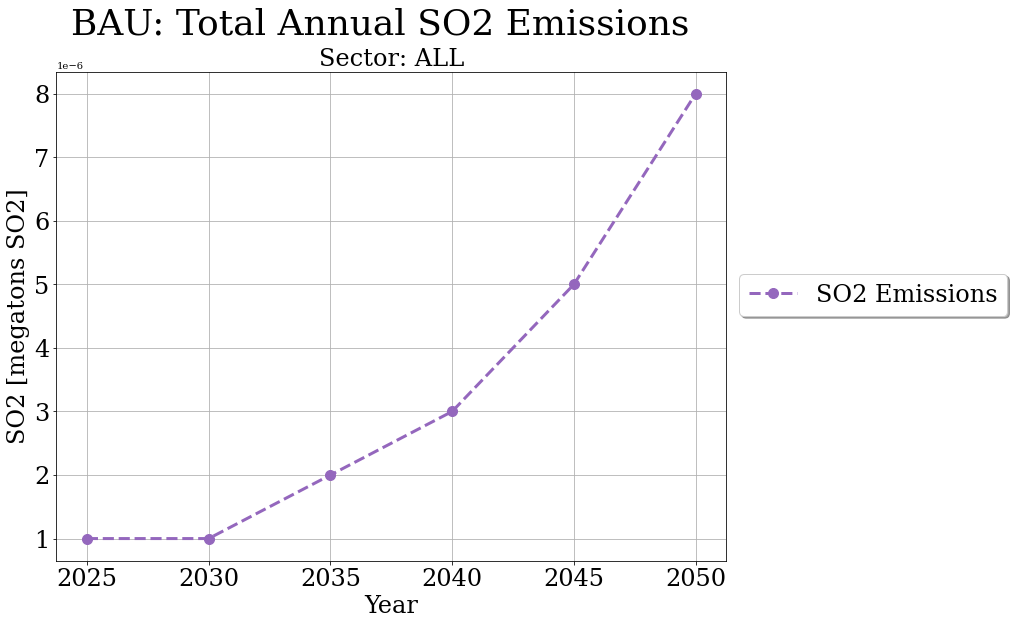

In [4]:
for file in file_list:
    make_emissions_plots(file_list, to_save=False)